In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow.keras import datasets, utils
from tensorflow import keras
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
from tensorflow.keras.models import Sequential

In [2]:
import pathlib

emotion_root = pathlib.Path("D:/image")

In [3]:
for item in emotion_root.glob("*"):
    print(item.name)

negative
neutral
positive


In [4]:
# # 이미지 파일이름들의 리스트

# list_ds = tf.data.Dataset.list_files(str(emotion_root/'*/*'))                                     

In [5]:
# 데이터 전처리 
batch_size = 32
img_height= 250
img_width = 250

In [6]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  emotion_root,
  validation_split=0.2,
  subset="training",
  seed=32,
  image_size=(img_height, img_width),
  batch_size=batch_size)

#model.fit에서 적용할 변수
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  emotion_root,
  validation_split=0.2,
  subset="validation",
  seed=32,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 12516 files belonging to 3 classes.
Using 10013 files for training.
Found 12516 files belonging to 3 classes.
Using 2503 files for validation.


In [33]:
#model - cnn에서는 dense 레이어를 쓰지 않음 
model = models.Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)))

model.add(layers.Conv2D(32, (3,3), padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(32, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
          
model.add(layers.MaxPooling2D(pool_size=(2,2)))
          
model.add(layers.Conv2D(64, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(64, (3,3)))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
          
model.add(layers.MaxPooling2D(pool_size=(2,2)))

#fully-connected network: 하나의 행으로 차원을 펼처쥼(보통 2개정도?)
model.add(layers.Flatten())

model.add(layers.Dense(128, activation=None))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(rate=0.3))
          
#outputlayer
model.add(layers.Dense(3, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
              # 성능의 차이가 있으므로 원핫인코딩하고 categorical_crossentropy가 낫다
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),# 
              metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 250, 250, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 250, 250, 32)      896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 250, 250, 32)      128       
_________________________________________________________________
activation_10 (Activation)   (None, 250, 250, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 248, 248, 32)      9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 248, 248, 32)      128       
_________________________________________________________________
activation_11 (Activation)   (None, 248, 248, 32)     

In [36]:
# early-stopping필요 
epochs=10
history = model.fit(
  train_ds,
  # batch_size 디폴트가 32
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
313/313 [==============================] - 1528s 5s/step - loss: 0.9408 - accuracy: 0.6368 - val_loss: 0.8885 - val_accuracy: 0.6432
Epoch 2/10
313/313 [==============================] - 7312s 23s/step - loss: 0.8732 - accuracy: 0.6555 - val_loss: 0.8958 - val_accuracy: 0.6460
Epoch 3/10
313/313 [==============================] - 8849s 28s/step - loss: 0.8404 - accuracy: 0.6603 - val_loss: 0.8949 - val_accuracy: 0.6476
Epoch 4/10
313/313 [==============================] - 3905s 12s/step - loss: 0.8154 - accuracy: 0.6665 - val_loss: 0.9079 - val_accuracy: 0.6053
Epoch 5/10
313/313 [==============================] - 2286s 7s/step - loss: 0.7748 - accuracy: 0.6821 - val_loss: 0.9289 - val_accuracy: 0.5941
Epoch 6/10
313/313 [==============================] - 1866s 6s/step - loss: 0.7087 - accuracy: 0.7138 - val_loss: 1.0492 - val_accuracy: 0.5625
Epoch 7/10
313/313 [==============================] - 2244s 7s/step - loss: 0.5862 - accuracy: 0.7700 - val_loss: 1.1665 - val_accura

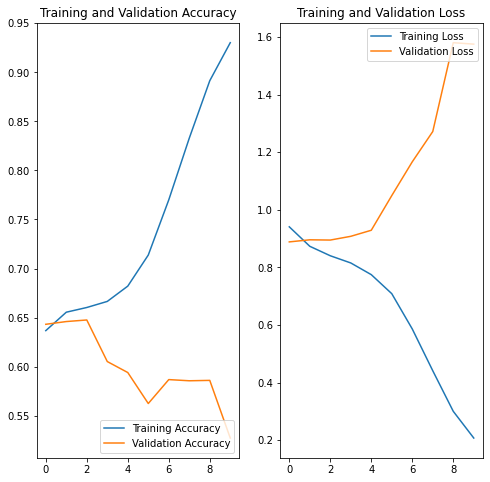

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

# 시각화 x축
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()